# Interactive stepper

Demo interactive graph stepper...

In [1]:
# Get dot file
!wget https://api.parliament.uk/procedures/work-packages/9/parse/log.dot
!head log.dot

--2021-08-03 08:26:06--  https://api.parliament.uk/procedures/work-packages/9/parse/log.dot
Resolving api.parliament.uk (api.parliament.uk)... 51.137.96.34
Connecting to api.parliament.uk (api.parliament.uk)|51.137.96.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/dot]
Saving to: ‘log.dot’

log.dot                 [ <=>                ]  48.69K  --.-KB/s    in 0.1s    

2021-08-03 08:26:08 (414 KB/s) - ‘log.dot’ saved [49861]

digraph G {
"Instrument created (Business step)" -> "AA (NOT)"
"AA (NOT)" -> "Instrument created (Business step)"
"Instrument created (Business step)" -> "AA (OR)"
"AA (OR)" -> "AC (AND)"
"AC (AND)" -> "Laid before the House of Commons (Business step)"
"Laid before the House of Commons (Business step)" -> "AE (NOT)"
"AE (NOT)" -> "AC (AND)"
"AC (AND)" -> "Laid before the House of Commons (Business step)"
"Laid before the House of Commons (Business step)" -> "AF (AND)"


Import required packages for [`mapio/GraphvizAnim`](https://github.com/mapio/GraphvizAnim):

In [2]:
from gvanim import Animation
from gvanim.jupyter import interactive

ga = Animation()

Load in data:

In [3]:
with open("log.dot") as f:
    # top and tail first line - leaves us with edge definitions
    dot = f.read().split('\n')[1:-1]

dot[:3]

['"Instrument created (Business step)" -> "AA (NOT)"',
 '"AA (NOT)" -> "Instrument created (Business step)"',
 '"Instrument created (Business step)" -> "AA (OR)"']

Build up the anination a step at a time:

In [4]:
ga = Animation()
ga.label_node( 1, "start" )

nodes = {}
nc = 2
for i,n in enumerate(dot[:100], start=1):
    ga.next_step()
    from_to = [i.strip() for i in n.split('->')]
    from_node = from_to[0]
    to_node = from_to[1]
    
    for node in [from_node, to_node]:
        if node not in nodes:
            nodes[node] = nc
            nc = nc +1

    ga.label_node(nodes[from_node], from_node )
    ga.label_node(nodes[to_node], to_node )
    ga.add_edge(nodes[from_node], nodes[to_node] )

View the animation interactively:

In [5]:
interactive( ga, 400 )

interactive(children=(IntSlider(value=0, description='n'), Output()), _dom_classes=('widget-interact',))

 We can also render an animated gif...

In [7]:
# Create an image frame for each step...
graphs = ga.graphs()
files = render( graphs, 'process', 'png' )

# Then an animated gif for each frame
from gvanim import Animation, render, gif
gif( files, 'process', 50 )

# And display the image
from IPython.display import Image
Image('process.gif')

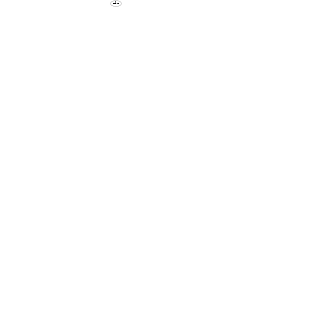

In [9]:
from IPython.display import Image

Image('process.gif')